In [90]:
import shap

from randomForest import prepareData
from randomForest import runRandomForest

In [2]:
filePath = "../../data/core/uk/final/uk_final.csv"

In [65]:
trainingData, trainingRt, testData, testRt = prepareData(filePath)

In [91]:
classifer, accuracyScore = runRandomForest(trainingData, trainingRt, testData, testRt)

In [92]:
print(accuracyScore)

0.7526545908806995


In [73]:
explainer = shap.TreeExplainer(classifer)

In [74]:
shapValues = explainer.shap_values(trainingData)

In [75]:
shap.initjs()

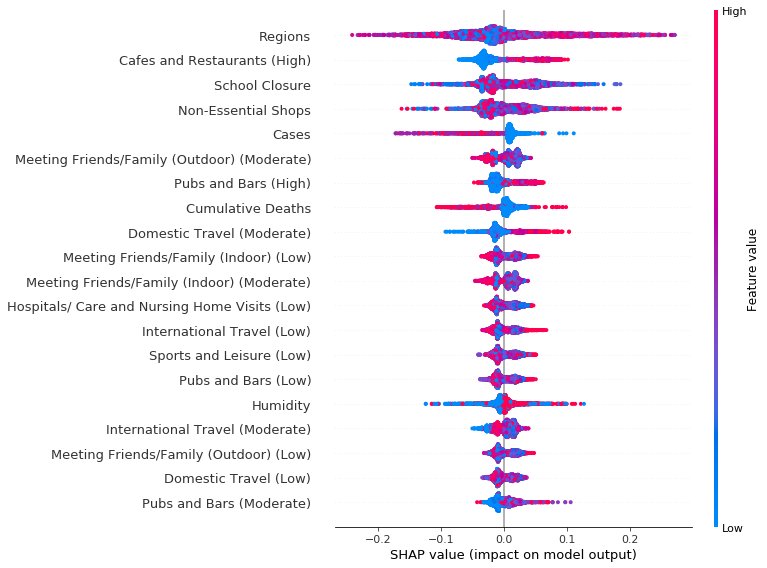

In [93]:
shap.summary_plot(shapValues[0], trainingData)

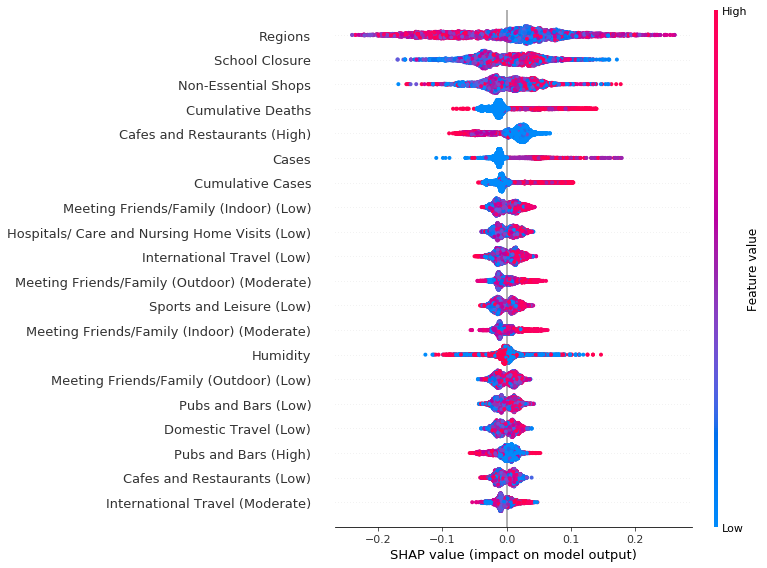

In [96]:
shap.summary_plot(shapValues[1], trainingData)

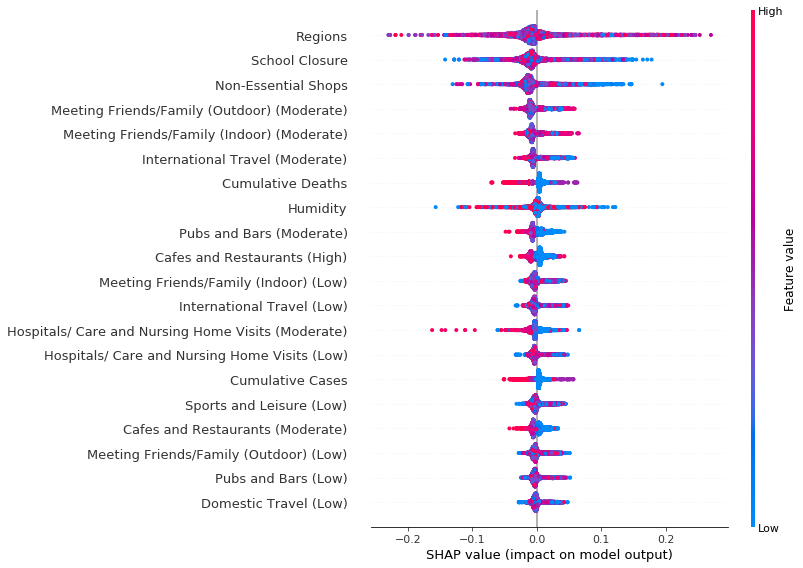

In [78]:
shap.summary_plot(shapValues[2], trainingData)

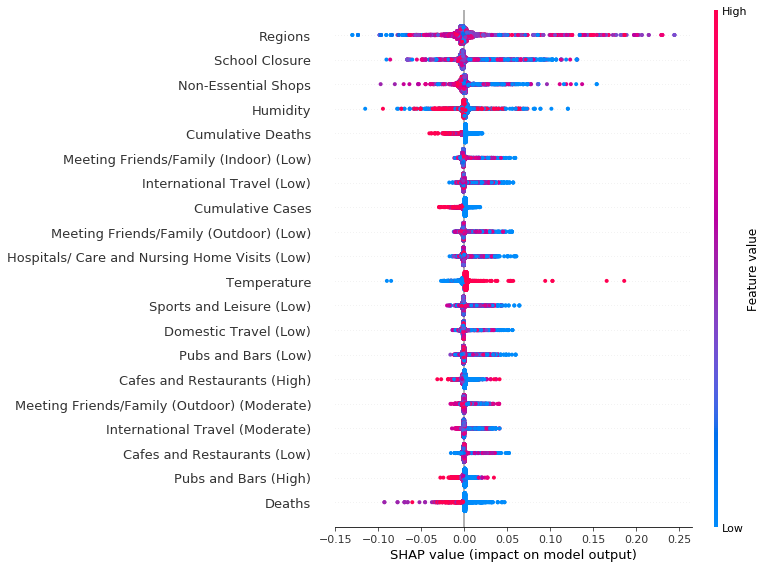

In [79]:
shap.summary_plot(shapValues[3], trainingData)

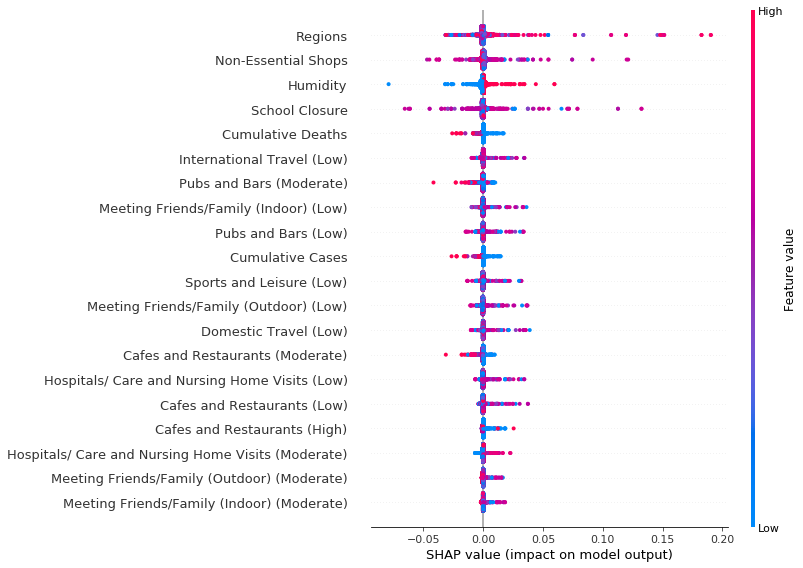

In [80]:
shap.summary_plot(shapValues[4], trainingData)

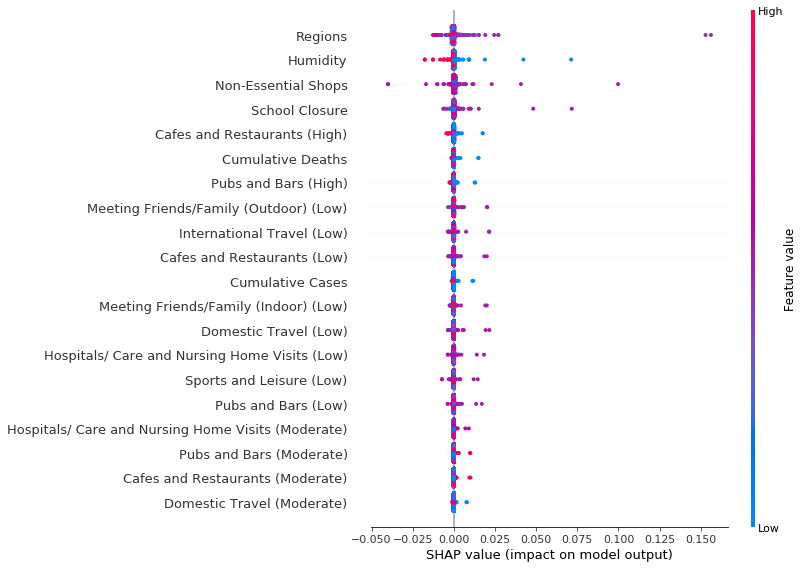

In [81]:
shap.summary_plot(shapValues[5], trainingData)

In [82]:
trainingData.iloc[0,:]

Regions                                                2
Cases                                                  0
Cumulative Cases                                       1
Deaths                                                 1
Cumulative Deaths                                      2
Tests                                                  0
Cumulative Tests                                       0
Meeting Friends/Family (Indoor) (Low)                 17
Meeting Friends/Family (Indoor) (Moderate)             9
Meeting Friends/Family (Indoor) (High)                 0
Meeting Friends/Family (Outdoor) (Low)                17
Meeting Friends/Family (Outdoor) (Moderate)            9
Meeting Friends/Family (Outdoor) (High)                0
Domestic Travel (Low)                                 17
Domestic Travel (Moderate)                             9
Domestic Travel (High)                                 0
International Travel (Low)                            17
International Travel (Moderate)

In [83]:
shap.force_plot(explainer.expected_value[0],
                shapValues[0][0], 
                trainingData.iloc[0])

In [84]:
shap.force_plot(explainer.expected_value[1],
                shapValues[0][0], 
                trainingData.iloc[0])

In [85]:
shap.force_plot(explainer.expected_value[2],
                shapValues[0][2], 
                trainingData.iloc[0])

In [86]:
shap.force_plot(explainer.expected_value[3],
                shapValues[0][0], 
                trainingData.iloc[0])

In [87]:
shap.force_plot(explainer.expected_value[4],
                shapValues[0][0], 
                trainingData.iloc[0])

In [88]:
shap.force_plot(explainer.expected_value[5],
                shapValues[0][0], 
                trainingData.iloc[0])